# 1. Random Walks

#### (a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

In [240]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol

In [241]:

def RandomWalks(t):
    pot=0
    for i in range(t):
        x=random.randint(0,1)
        if x==1:
            pot+=1
        else:
            pot-=1
    return pot

In [242]:
RandomWalks(100)

20

#### (b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

In [243]:
def N_repeatRW(n,t):#(반복시행,시간)
    pots=[]
    pots_per=[]
    x=[]
    add=0
    max_pot=0
    min_pot=0
    for i in range(n):
        pots.append(RandomWalks(t))
    
    pots.sort()
    max_pot=pots[n-1] 
    min_pot=pots[0]

    for i in range(min_pot,max_pot+1):
        x.append(i)
        add=0
        for j in range(n):
           
                if pots[j]==i:
                    add+=1
        
        pots_per.append(add/n)
    print("위치 : 확률")
    #상세값
    #for i in range (max_pot+1-min_pot):
        #print(x[i],":",pots_per[i])
    
    plt.bar(x,pots_per,label="n=%d t=%d"%(n,t))
    plt.xlabel("x-position")
    plt.ylabel("percentage")
    plt.legend()
    plt.show()
    



위치 : 확률


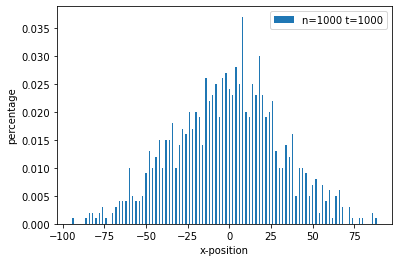

In [244]:
N_repeatRW(1000,1000)#(반복시행,시간)


# 2. Bifurcation
 다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

#### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [245]:
def fx(r,x0):
    dt=0.1
    t=np.arange(0,10,dt)
    x=np.array([])
    xt=x0
    for i in t:
        x=np.append(x,xt)
        xt =xt+(r-xt)*x0*dt
    
    
    plt.plot(t,x,label="r=%d x(0)=%d"%(r,x0))
    plt.xlabel("t")
    plt.ylabel("x")
    plt.legend()
    plt.show()


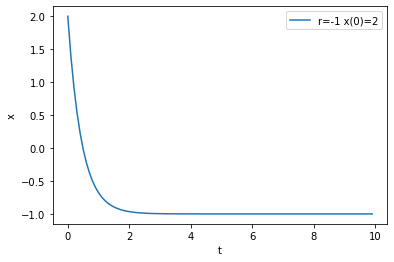

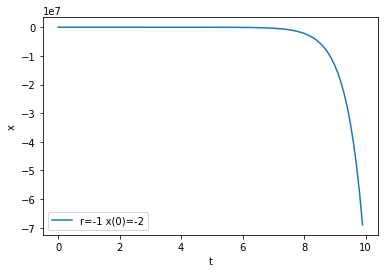

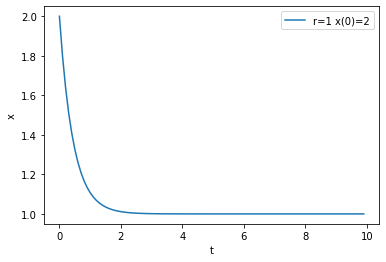

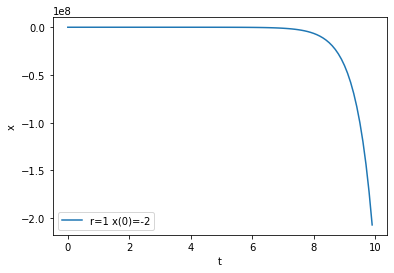

In [246]:
fx(-1,2)
fx(-1,-2)
fx(1,2)
fx(1,-2)


#### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1. r=-1
2. r=1

In [247]:
x = Symbol("x")
r=-1
sympy.solve(x*(r-x))

[-1, 0]

In [248]:
r=1
sympy.solve(x*(r-x))

[0, 1]